In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 


# change dpi of plots to 300
plt.rcParams['figure.dpi'] = 150

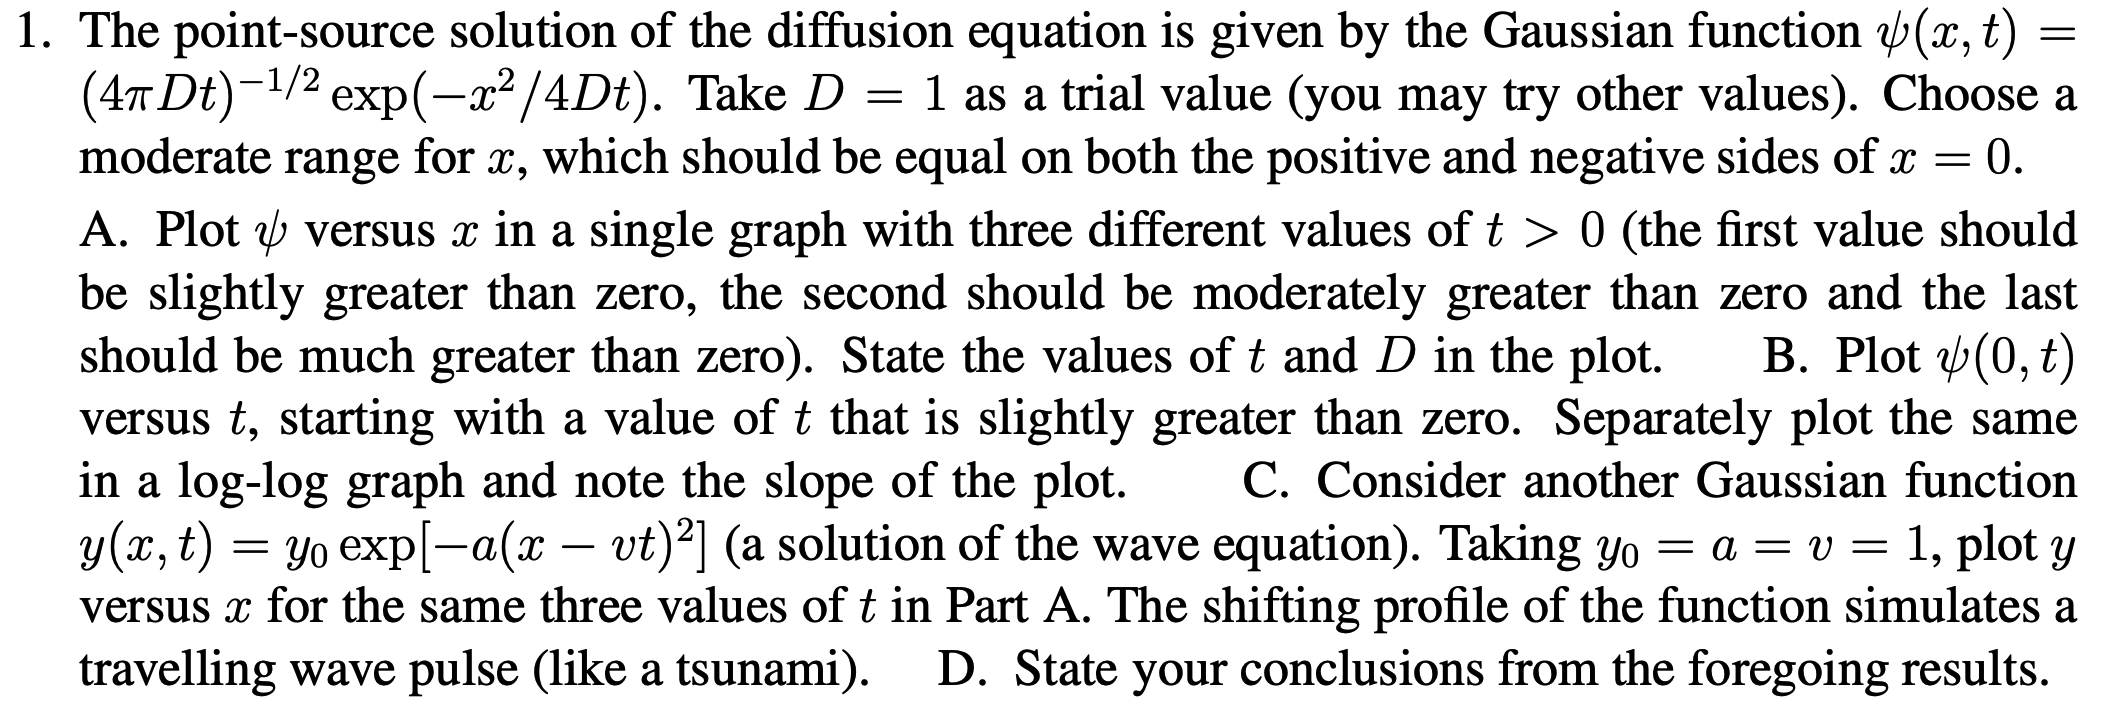

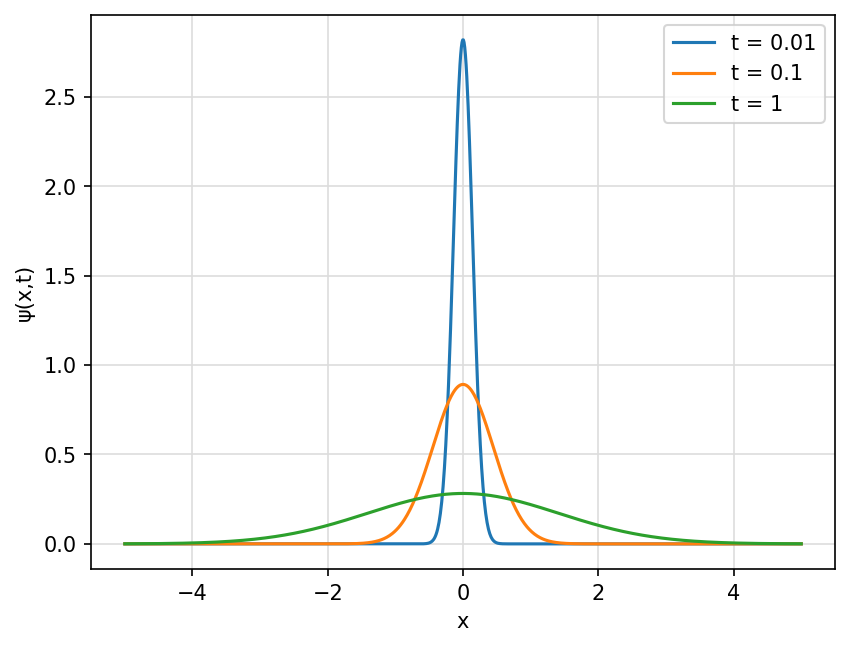

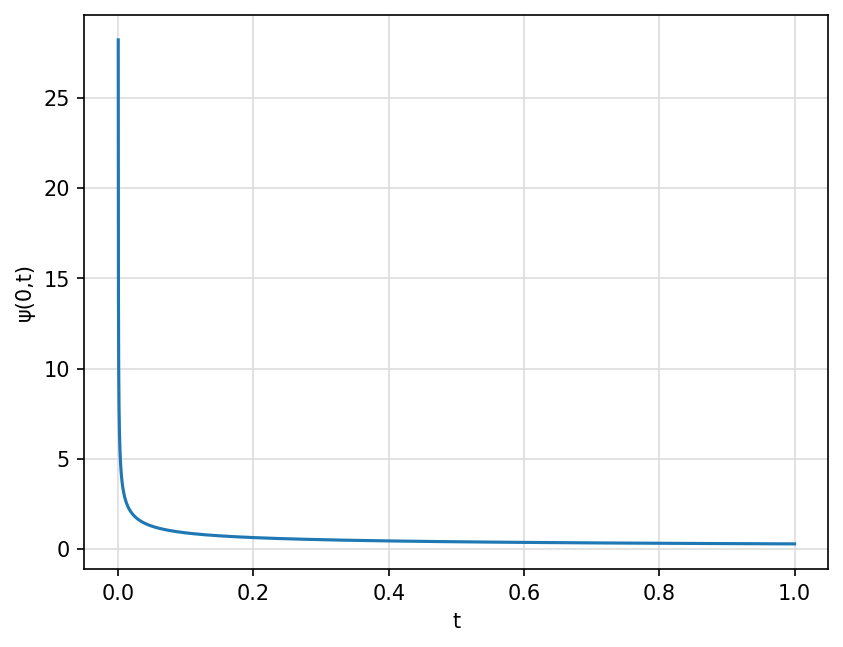

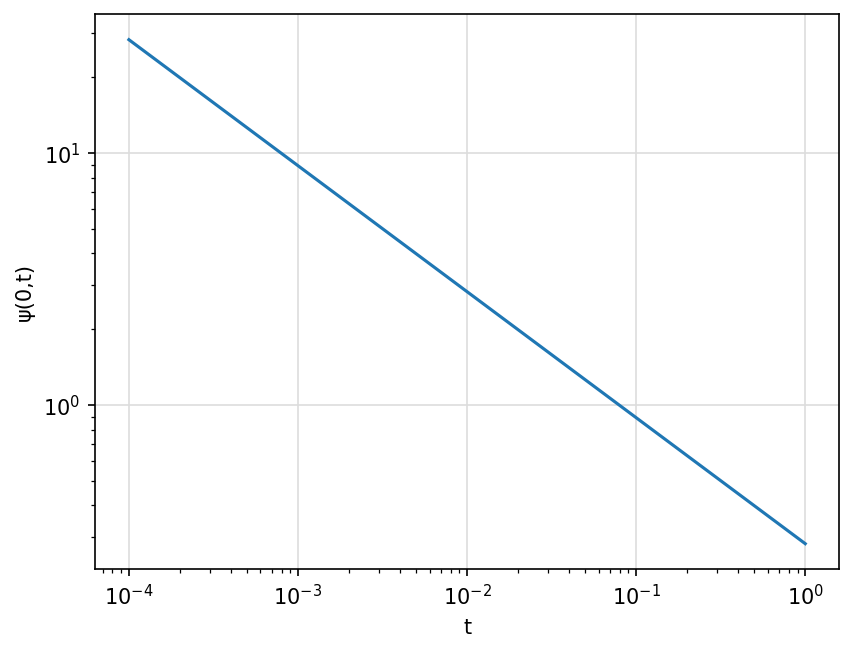

Slope of log-log plot is -0.5000000000000007


In [12]:
def psi(x,t,D=1):
    return (4*np.pi*D*t)**(-1/2)*np.exp(-x**2/(4*D*t))

# Plot for t = 0.1, 0.5, 1, 10 in single plot
t = [0.01, 0.1,1]
x = np.linspace(-5,5,1000)
for i in t:
    plt.plot(x,psi(x,i),label='t = '+str(i))
plt.legend()
plt.xlabel('x')
plt.ylabel('ψ(x,t)')
# plt.title('Plot for t = 0.1, 1, 10 in single plot')
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
plt.savefig('Q1A1.png')
plt.show()


# plot psi(0,t) vs t
t = np.linspace(0.0001,1,10000)
plt.plot(t,psi(0,t))
plt.xlabel('t')
plt.ylabel('ψ(0,t)')
# plt.title('Plot psi(0,t) vs t')
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
plt.savefig('Q1A2.png')
plt.show()

t = np.linspace(0.0001, 1, 10000)
plt.plot(t, psi(0, t))
plt.xlabel('t')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('ψ(0,t)')
# plt.title('Plot psi(0,t) vs t')
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
plt.savefig('Q1A3.png')
plt.show()

# print slope of log-log plot
print('Slope of log-log plot is',np.polyfit(np.log(t),np.log(psi(0,t)),1)[0])


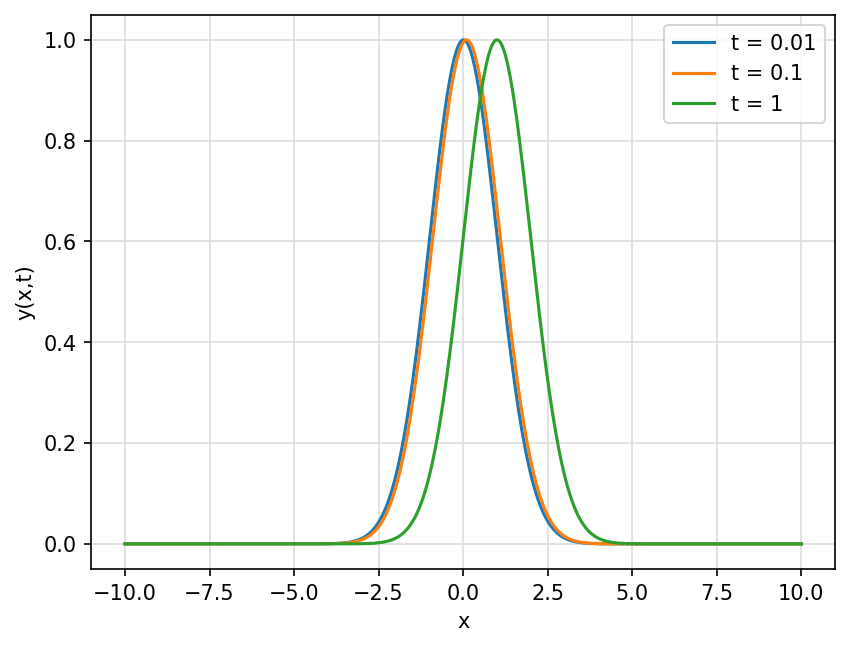

In [15]:
# y = y0e^(-a(x-vt^2))

def ypsi(y0, a, v,x, t):
    return y0*np.exp(-a*((x - v*t)**2))

y0 = a = v = 1
a = 0.5

# y vs x for t = 0.1, 0.5, 1, 10 in single plot
t = [0.01, 0.1, 1]
x = np.linspace(-10,10,1000)
for i in t:
    plt.plot(x,ypsi(y0,a,v,x,i), label = 't = '+str(i))
plt.legend()
plt.xlabel('x')
plt.ylabel('y(x,t)')
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
plt.savefig('Q1_B.png')
plt.show()

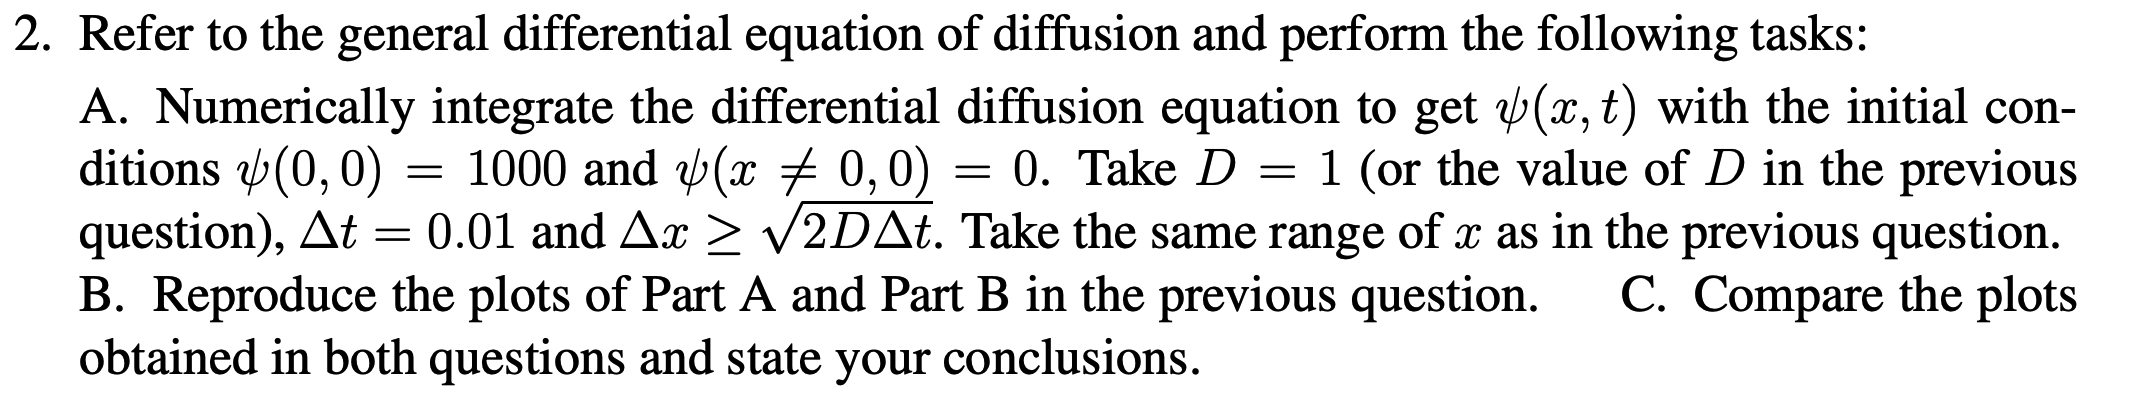

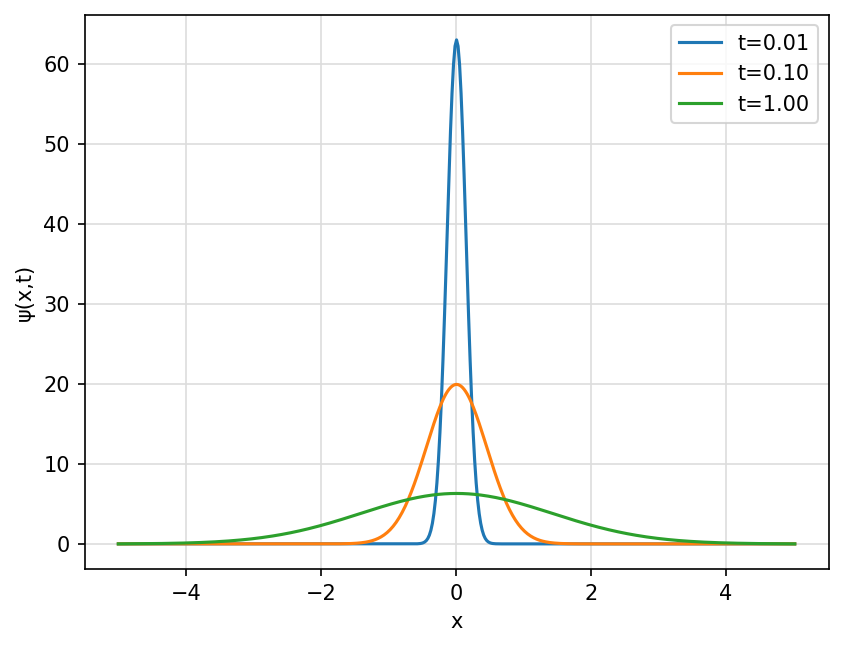

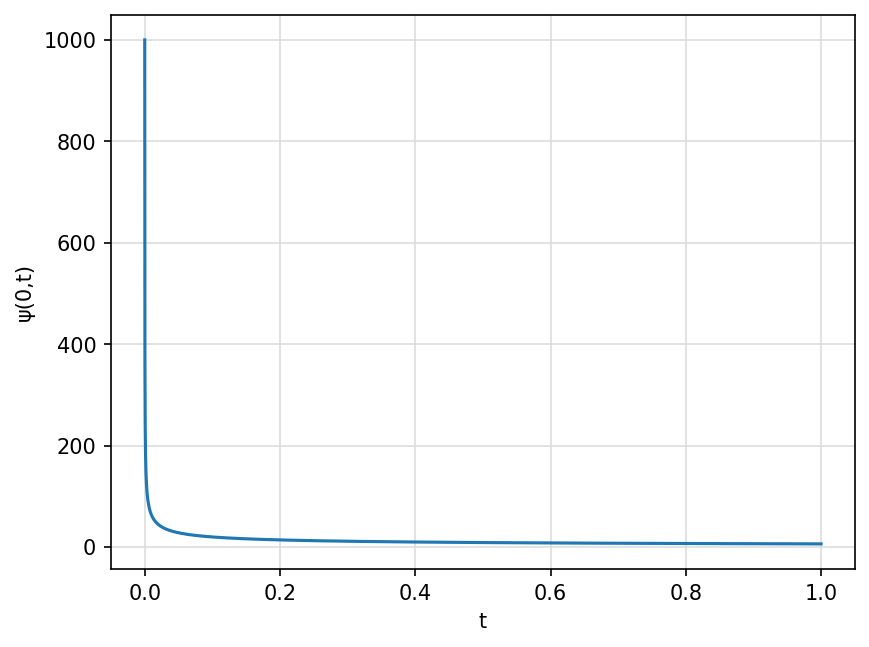

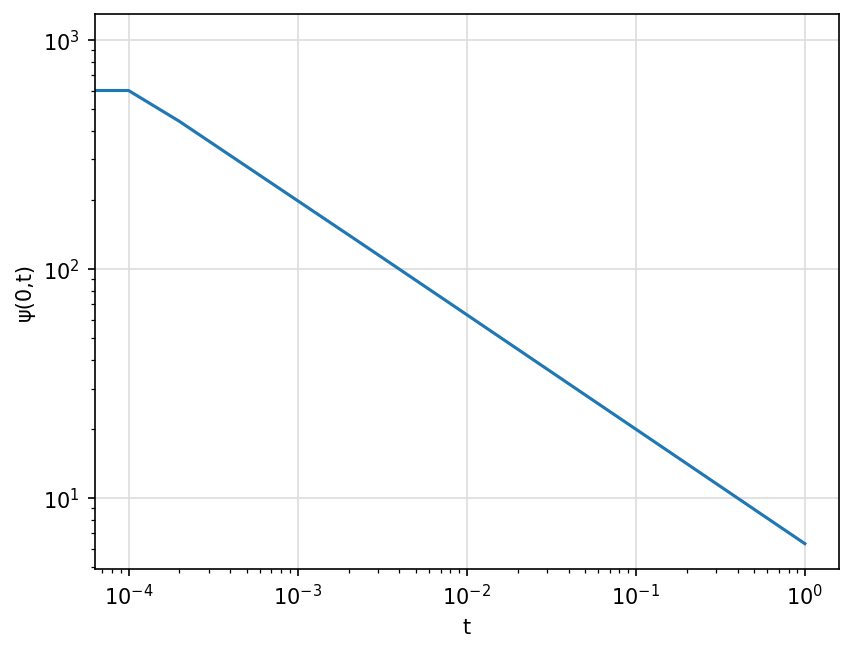

-0.4807483548166306


In [14]:
import numpy as np
import matplotlib.pyplot as plt

D = 1
dt = 0.0001
dx = np.sqrt( 5* D * dt) 
x_range = np.arange(-5, 5 + dx, dx)
t_range = np.arange(0, 1 + dt, dt)

psi = np.zeros((len(x_range), len(t_range)))
psi[len(x_range)//2, 0] = 1000

for n in range(0, len(t_range) - 1):
    for j in range(1, len(x_range) - 1):
        psi[j, n + 1] = psi[j, n] + D * dt / dx ** 2 * \
            (psi[j + 1, n] - 2 * psi[j, n] + psi[j - 1, n])

for i in range(len(t_range)):
    if t_range[i] == 0.01:
        plt.plot(x_range, psi[:, i], label=f't={(i*dt):.2f}')
    if t_range[i] == 0.1:
        plt.plot(x_range, psi[:, i], label=f't={(i*dt):.2f}')
    if t_range[i] == 1:
        plt.plot(x_range, psi[:, i], label=f't={(i*dt):.2f}')
    # if (10*i*dt) % 1 == 0:
    #     continue
plt.legend()
plt.xlabel('x')
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
plt.ylabel('ψ(x,t)')
# plt.title('Part A')
plt.savefig('Q2_parta.png')
plt.show()

# Part B: 
# Plot ψ(0, t) versus t, starting with a value of t that is slightly greater than zero. Separately plot the same in a log-log graph and note the slope of the plot.
plt.plot(t_range, psi[len(x_range)//2, :])
plt.xlabel('t')
plt.ylabel('ψ(0,t)')
# plt.title('Part B')
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
plt.savefig('Q2_partb1.png')
plt.show()

plt.plot(t_range, psi[len(x_range)//2, :])
plt.xlabel('t')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('ψ(0,t)')
# plt.title('Part B')
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
plt.savefig('Q2_partb2.png')
plt.show()

# find slope of line in log-log plot    
def slope(x1, y1, x2, y2):
    return np.log(y2/y1)/np.log(x2/x1)

# find slope of line in log-log plot
print(slope(0.001, psi[len(x_range)//2, 1], 0.01, psi[len(x_range)//2, 10]))

